# Finding and removing outliers

**Importing necessary libraries**

In [39]:
import pandas as pd
import numpy as np

**Taking input from the user**

In [44]:
n = int(input('Enter the number of elements: '))

print('Enter the element names in comma separated manner: ')
names= input()
X_names = names.split(',')

print('Enter the values in comma separated manner: ')
values = input()
X_values = map(int,values.split(','))

X = {'Name': X_names,
     'Values': X_values}
df = pd.DataFrame(X)
df

# 45,37,59,150,47,39,5,43,52,100
# A,B,C,D,E,F,G,H,I,J

Enter the number of elements: 10
Enter the element names in comma separated manner: 
A,B,C,D,E,F,G,H,I,J
Enter the values in comma separated manner: 
45,37,59,150,47,39,5,43,52,100


,Name,Values
0,A,45
1,B,37
2,C,59
3,D,150
4,E,47
5,F,39
6,G,5
7,H,43
8,I,52
9,J,100


**Calculating quartiles**

In [45]:
quartiles = df.Values.quantile([0.25,.5,.75])
quartiles = np.array(quartiles)
quartiles

array([40.  , 46.  , 57.25])

**Calculating valid range**

In [46]:
iqr = quartiles[2] - quartiles[0]
low = quartiles[0] - (1.5*iqr)
high = quartiles[2] + (1.5*iqr)

print("Lowest Value = {}".format(low))
print("Highest Value = {}".format(high))
print("Interquartile Range (Q3-Q1) = {}".format(iqr))

Lowest Value = 14.125
Highest Value = 83.125
Interquartile Range (Q3-Q1) = 17.25


**Removing Outliers**

In [67]:
print("------------- With Outliers -------------")
df

------------- With Outliers -------------


,Name,Values
0,A,45
1,B,37
2,C,59
3,D,150
4,E,47
5,F,39
6,G,5
7,H,43
8,I,52
9,J,100


In [68]:
print("------------- Without Outliers -------------")
df_without_outliers = df[(df.Values >= low) & (df.Values <= high)]
df_without_outliers

------------- Without Outliers -------------


,Name,Values
0,A,45
1,B,37
2,C,59
4,E,47
5,F,39
7,H,43
8,I,52


In [69]:
print("------------- Only Outliers -------------")
df_outliers = df[(df.Values < low) | (df.Values > high)]
df_outliers

------------- Only Outliers -------------


,Name,Values
3,D,150
6,G,5
9,J,100


**Plotting the results**

--------------------- With outliers ---------------------
AxesSubplot(0.125,0.125;0.775x0.755)


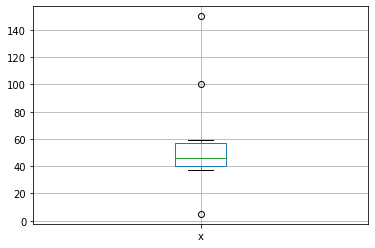

In [65]:
print ("--------------------- With outliers ---------------------")
print(pd.plotting.boxplot(df.Values))

--------------------- Without outliers ---------------------
AxesSubplot(0.125,0.125;0.775x0.755)


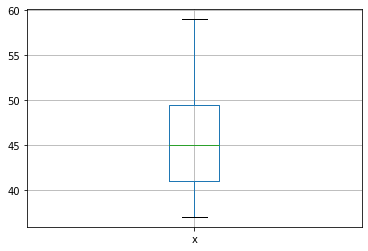

In [66]:
print ("--------------------- Without outliers ---------------------")
print(pd.plotting.boxplot(df_without_outliers.Values))